In [1]:
import os
import numpy as np
import nibabel as nib
import torch
import matplotlib.pyplot as plt
import glob
from train import learn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
import torch.nn as nn
from PIL import Image
import gif
from inference import Blender
from tqdm import tqdm
label_regex = "NFBS_Dataset/*/*brainmask*"
data_regex = "NFBS_Dataset/*/*T1w.nii.gz"

In [2]:
data = glob.glob(data_regex)
label = glob.glob(label_regex)

In [3]:
data = nib.load(data[7]).get_fdata()
label = nib.load(label[7]).get_fdata()

In [4]:
@gif.frame
def plot(base, strip, mask, channel):
    f, axarr = plt.subplots(1, 3)
    axarr[0].imshow(base, cmap="gray")
    axarr[0].set_title("Base image")

    axarr[1].imshow(mask, cmap="gray")
    axarr[1].set_title("Segmentation mask")

    axarr[2].imshow(strip, cmap="gray")
    axarr[2].set_title("Segmented image")
    


In [5]:
frames = []
stripper = Blender()


for c in tqdm(range(int(0.3*data.shape[0]),int(0.8*data.shape[0]))):
    strip = stripper(data[c,:,:]/255)
    mask = label[c,:,:]
    frames.append(plot(data[c,:,:],strip,mask,c))
gif.save(frames, 'example0.gif', duration=30, unit="s", between="startend")

# frames = []
# stripper = Blender()

# for c in tqdm(range(data.shape[1])):
#     strip = stripper(data[:,c,:])
#     mask = label[:,c,:]
#     frames.append(plot(data[:,c,:],strip,mask,c))
# gif.save(frames, 'example1.gif', duration=30, unit="s", between="startend")

# frames = []
# stripper = Blender()

# for c in tqdm(range(data.shape[2])):
#     strip = stripper(data[:,:,c])
#     mask = label[:,:,c]
#     frames.append(plot(data[:,:,c],strip,mask,c))
# gif.save(frames, 'example2.gif', duration=30, unit="s", between="startend")


100%|██████████| 128/128 [02:02<00:00,  1.05it/s]


In [87]:
a = np.uint8((data[220,:,:]/data[220,:,:].max())*255)
b = np.uint8(label[220,:,:]*255)

In [88]:
 k =Image.fromarray(a)
 z = Image.fromarray(b)

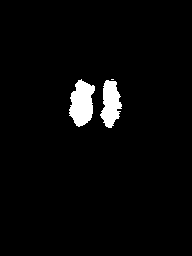

In [90]:
z

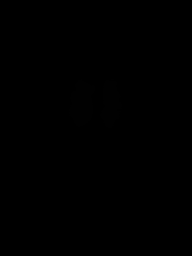

In [86]:
z

In [24]:
a = .astype('int')

In [29]:
a = 'NFBS_Dataset/A00056306/issou'
a[:22]

'NFBS_Dataset/A00056306'

In [26]:
getsizeof(a)

393328

In [8]:
from sys import getsizeof

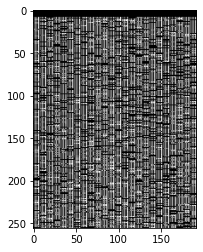

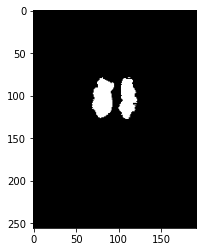

In [77]:
plt.imshow(k,cmap='gray')
plt.show()
plt.imshow(label[220,:,:],cmap='gray')
plt.show()